Name: Ni-Yun Hsieh, github username: nihsieh

1.
TextClassification
It is highly recommended that you complete this project using Keras
1
and Python.
(a)
In this problem, we are trying to build a classifier to analyze the sentiment of
reviews. You are provided with text data in two folders: one folder involves
positive reviews, and one folder involves negative reviews.
(b)
Data Exploration and Pre-processing
i.
You can use binary encoding for the sentiments , i.e
y
= 1 for positive senti-
ments and
y
=
−
1 for negative sentiments.

In [51]:
import os
import pandas as pd

folderpath = r"../data/pos"
inputlst = [os.listdir(folderpath)]
filenamecontent = []
for filename in os.listdir(folderpath):
    if filename.endswith(".txt"):
        f = open(os.path.join(folderpath,filename), 'r')
        filenamecontent.append(f.read())
#print(filenamecontent[0])

path = r"../data/neg"
inputlst = [os.listdir(path)]
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        f = open(os.path.join(path,filename), 'r')
        filenamecontent.append(f.read())

classlist = [1] * 1000 + [-1] * 1000
df = pd.DataFrame((zip(classlist, filenamecontent)), columns = ['class', 'review'])
#print(filenamecontent[0])
print(df)

      class                                             review
0         1  assume nothing . \nthe phrase is perhaps one o...
1         1  plot : derek zoolander is a male model . \nhe ...
2         1  i actually am a fan of the original 1961 or so...
3         1  a movie that's been as highly built up as the ...
4         1   " good will hunting " is two movies in one : ...
...     ...                                                ...
1995     -1  synopsis : when a meteorite crashlands in the ...
1996     -1  it's now the anniversary of the slayings of ju...
1997     -1  coinciding with the emerging popularity of mov...
1998     -1  and now the high-flying hong kong style of fil...
1999     -1  battlefield long , boring and just plain stupi...

[2000 rows x 2 columns]


The reviews above do not sort by the file name numbers.
We can see the below smaller dataset.  The dataframe prints the positive reviews in the order of file name 000-002-003-001-004, not 000-001-002-003-004.

import os
import pandas as pd

folderpath = r"../data/test"
inputlst = [os.listdir(folderpath)]
filenamecontent = []
for filename in os.listdir(folderpath):
    if filename.endswith(".txt"):
        f = open(os.path.join(folderpath,filename), 'r')
        filenamecontent.append(f.read())
#print(filenamecontent)


path = r"../data/test2"
inputlst = [os.listdir(path)]
#content = []
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        f = open(os.path.join(path,filename), 'r')
        filenamecontent.append(f.read())
print(filenamecontent[0])

classlist = [1]* 5 + [-1] * 5
df = pd.DataFrame((zip(classlist, filenamecontent)), columns = ['class', 'review'])
print(df)

ii.
The data are pretty clean. Remove the punctuation and numbers from the
data.

In [52]:
import re
reviews = []
for string in filenamecontent:
    newstring = re.sub(r'[^\w\s]', '', string)
    finalstring = re.sub(r'[0-9]+', '', newstring)
    ss = re.sub(r'[\n]+', '', finalstring)
    reviews.append(ss)
classlist = [1] * 1000 + [-1] * 1000
df = pd.DataFrame((zip(classlist, reviews)), columns = ['class', 'review'])
#print(reviews[0])
print(df)

      class                                             review
0         1  assume nothing  the phrase is perhaps one of t...
1         1  plot  derek zoolander is a male model  he is a...
2         1  i actually am a fan of the original  or so liv...
3         1  a movie thats been as highly built up as the t...
4         1    good will hunting  is two movies in one  an ...
...     ...                                                ...
1995     -1  synopsis  when a meteorite crashlands in the a...
1996     -1  its now the anniversary of the slayings of jul...
1997     -1  coinciding with the emerging popularity of mov...
1998     -1  and now the highflying hong kong style of film...
1999     -1  battlefield long  boring and just plain stupid...

[2000 rows x 2 columns]


iii.
The name of each text file starts with
cv
number
. Use text files 0-699 in each
class for training and 700-999 for testing.

In [53]:
folderpath = r"../data/pos/train"
inputlst = [os.listdir(folderpath)]
train = []
for filename in os.listdir(folderpath):
    if filename.endswith(".txt"):
        f = open(os.path.join(folderpath,filename), 'r')
        train.append(f.read())
path = r"../data/neg/train"
inputlst = [os.listdir(path)]
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        f = open(os.path.join(path,filename), 'r')
        train.append(f.read())
trainreview = []
for string in train:
    newstring = re.sub(r'[^\w\s]', '', string)
    finalstring = re.sub(r'[0-9]+', '', newstring)
    ss = re.sub(r'[\n]+', '', finalstring)
    trainreview.append(ss)
classlist = [1] * 700 + [-1] * 700
traindata = pd.DataFrame((zip(classlist, trainreview)), columns = ['class', 'review'])
trainx = traindata.iloc[:, [1]]
print('trainx:', trainx)
trainy = traindata.iloc[:, [0]]
print('trainy:', trainy)

folderpath = r"../data/pos/test"
inputlst = [os.listdir(folderpath)]
test = []
for filename in os.listdir(folderpath):
    if filename.endswith(".txt"):
        f = open(os.path.join(folderpath,filename), 'r')
        test.append(f.read())
path = r"../data/neg/test"
inputlst = [os.listdir(path)]
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        f = open(os.path.join(path,filename), 'r')
        test.append(f.read())
testreview = []
for string in test:
    newstring = re.sub(r'[^\w\s]', '', string)
    finalstring = re.sub(r'[0-9]+', '', newstring)
    ss = re.sub(r'[\n]+', '', finalstring)
    testreview.append(ss)
classes = [1] * 300 + [-1] * 300
testdata = pd.DataFrame((zip(classes, testreview)), columns = ['class', 'review'])
testx = testdata.iloc[:, [1]]
print('testx:', testx)
testy = testdata.iloc[:, [0]]
print('testy:', testy)

trainx:                                                  review
0     plot  derek zoolander is a male model  he is a...
1       good will hunting  is two movies in one  an ...
2     the story of us  a rob reiner film  is the sec...
3       the fighting sullivans  contains a major plo...
4     george little  jonathan lipnicki  wants a litt...
...                                                 ...
1395  synopsis  when a meteorite crashlands in the a...
1396  its now the anniversary of the slayings of jul...
1397  coinciding with the emerging popularity of mov...
1398  and now the highflying hong kong style of film...
1399  battlefield long  boring and just plain stupid...

[1400 rows x 1 columns]
trainy:       class
0         1
1         1
2         1
3         1
4         1
...     ...
1395     -1
1396     -1
1397     -1
1398     -1
1399     -1

[1400 rows x 1 columns]
testx:                                                 review
0    assume nothing  the phrase is perhaps one of t...
1

iv.
Count the number of unique words in the whole dataset (train + test) and
print it out.

In [54]:
unique = set([])
for string in reviews:
    for s in string.split():
        #print(s)
        unique.add(s)
print(len(unique))

47037


v.
Calculate the average review length and the standard deviation of review
lengths. Report the results.

In [55]:
import statistics
import numpy as np
count = []
for r in reviews:
    word = r.split()
    count.append(len(word))
#print(count)
mean = statistics.mean(count)
#h = np.mean(count)
print('average review length:', mean)

stdlen = np.std(count, ddof = 1)
print('standard deviation of review lengths:', stdlen)

average review length: 644.3575
standard deviation of review lengths: 285.05139508985275


vi.
Plot the histogram of review lengths.

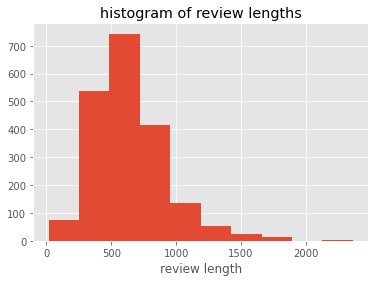

In [56]:
import matplotlib.pyplot as plt
rlen = []

for r in reviews:
    word = r.split()
    rlen.append(len(word))
plt.style.use('ggplot')
plt.hist(rlen)
plt.xlabel("review length")
plt.title('histogram of review lengths')
plt.show()

vii.
To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to rep-
resent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method.


In [57]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(reviews)
#t.fit_on_texts(trainreview)
#print(t.word_counts)
#print(t.document_count)
print(t.word_index)
#encoded_trainreview = t.texts_to_matrix(trainreview, mode = 'count')
#print(encoded_trainreview)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'that': 8, 'it': 9, 'as': 10, 'with': 11, 'for': 12, 'his': 13, 'this': 14, 'film': 15, 'but': 16, 'he': 17, 'i': 18, 'on': 19, 'are': 20, 'by': 21, 'be': 22, 'its': 23, 'an': 24, 'not': 25, 'one': 26, 'movie': 27, 'who': 28, 'from': 29, 'at': 30, 'was': 31, 'have': 32, 'has': 33, 'her': 34, 'you': 35, 'they': 36, 'all': 37, 'so': 38, 'like': 39, 'about': 40, 'out': 41, 'more': 42, 'when': 43, 'which': 44, 'their': 45, 'up': 46, 'or': 47, 'what': 48, 'some': 49, 'just': 50, 'if': 51, 'there': 52, 'she': 53, 'him': 54, 'into': 55, 'even': 56, 'only': 57, 'than': 58, 'no': 59, 'we': 60, 'good': 61, 'most': 62, 'time': 63, 'can': 64, 'will': 65, 'story': 66, 'films': 67, 'been': 68, 'would': 69, 'much': 70, 'also': 71, 'characters': 72, 'other': 73, 'get': 74, 'character': 75, 'do': 76, 'them': 77, 'very': 78, 'two': 79, 'first': 80, 'after': 81, 'see': 82, 'well': 83, 'because': 84, 'way': 85, 'make': 86, 'any': 87, 'does':

viii.
Select a review length
L
that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.

In [58]:
#print(np.percentile(count, 75))
count.sort
L = count[599]
print('L that 70% of the reviews have a length below it:', count[599])
print('L that 90% of the reviews have a length below it:', count[199])

L that 70% of the reviews have a length below it: 579
L that 90% of the reviews have a length below it: 617


ix.
Truncate reviews longer than
L
words and zero-pad reviews shorter than
L
so that all texts (= data points) are of length
L
.


In [59]:
from keras.preprocessing.sequence import pad_sequences
sequences = t.texts_to_sequences(reviews)
trainxse = t.texts_to_sequences(trainreview)
testxse = t.texts_to_sequences(testreview)
post_pad = pad_sequences(sequences, padding = 'post', maxlen = count[599], truncating = 'post')
#print(len(train_pad))
train_pad = pad_sequences(trainxse, padding = 'post', maxlen = count[599], truncating = 'post')
test_pad = pad_sequences(testxse, padding = 'post', maxlen = count[599], truncating = 'post')
print('First five data points after truncating:')
print(post_pad[:5])
#print('First five data points sequences before truncating:')
#print(sequences[:5])

First five data points after truncating:
[[ 2500   181     1 ...    15    69    32]
 [   98  2275  8122 ...     6    24   466]
 [   18   174   679 ...     4   105 27328]
 [    2    27   185 ...     0     0     0]
 [   61    65  1968 ...     0     0     0]]


(c)
Word Embeddings
i.
One can use tokenized text as inputs to a deep neural network. However, a re-
cent breakthrough in NLP suggests that more sophisticated representations of
text yield better results. These sophisticated representations are called
word
embeddings
. “Word embedding is a term used for representation of words
for text analysis, typically in the form of a real-valued vector that encodes
the meaning of the word such that the words that are closer in the vector
space are expected to be similar in meaning.”
4
. Most deep learning modules
(including Keras) provide a convenient way to convert positive integer rep-
resentations of words into a word embedding by an “Embedding layer.” The
layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary
size (e.g. the largest integer value). The layer also allows you to specify the
dimension for each word vector, called the “output dimension.” We would like
to use a word embedding layer for this project. Assume that we are inter-
ested in the top 5,000 words. This means that in each integer sequence that
represents each document, we set to zero those integers that represent words
that are not among the top 5,000 words in the document.
5
If you feel more
adventurous, use all the words that appear in this corpus. Choose the length
of the embedding vector for each word to be 32. Hence, each document is
represented as a 32
×
L
matrix.

In [60]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')
t = Tokenizer(num_words = 5001)
t.fit_on_texts(trainreview)
tdict = t.word_index
trainxse = t.texts_to_sequences(trainreview)
testxse = t.texts_to_sequences(testreview)
train_pad = pad_sequences(trainxse, padding = 'post', maxlen = count[599], truncating = 'post')
test_pad = pad_sequences(testxse, padding = 'post', maxlen = count[599], truncating = 'post')
#print(tdict)
model = Sequential()
model.add(Embedding(5000, 32, input_length = L))
eminput = len(unique)

ii.
Flatten the matrix of each document to a vector.

In [61]:
model.add(Flatten())
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 579, 32)           160000    
                                                                 
 flatten_9 (Flatten)         (None, 18528)             0         
                                                                 
Total params: 160,000
Trainable params: 160,000
Non-trainable params: 0
_________________________________________________________________
None


(d)
Multi-Layer Perceptron
i.
Train a MLP with three (dense) hidden layers each of which has 50 ReLUs
and one output layer with a single sigmoid neuron. Use a dropout rate of
20% for the first layer and 50% for the other layers. Use ADAM optimizer
and binary cross entropy loss (which is equivalent to having a softmax in the
output). To avoid overfitting, just set the number of epochs as 2. Use a batch
size of 10.

In [62]:
model = Sequential()
model.add(Embedding(eminput, 32, input_length = L))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
trainy = array([1] * 700 + [0] * 700)
testy = array([1]* 300 + [0] * 300)
history = model.fit(train_pad, trainy, validation_data = (test_pad, testy), epochs = 2, batch_size = 10)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 579, 32)           1505184   
                                                                 
 flatten_10 (Flatten)        (None, 18528)             0         
                                                                 
 dense_30 (Dense)            (None, 50)                926450    
                                                                 
 dropout_24 (Dropout)        (None, 50)                0         
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_32 (Dense)            (None, 50)              

ii.
Report the train and test accuracies of this model.

In [63]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
loss, accuracy = model.evaluate(train_pad, trainy, verbose = 0)
print('Train accuracy:', accuracy)
loss, accuracy = model.evaluate(test_pad, testy, verbose = 0)
print('Test accuracy:', accuracy)

Train accuracy: 0.9442856907844543
Test accuracy: 0.6266666650772095


(e)
One-Dimensional Convolutional Neural Network
:
Although CNNs are mainly used for image data, they can also be applied to text
data, as text also has adjacency information. Keras supports one-dimensional
convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.
i.
After the embedding layer, insert a Conv1D layer. This convolutional layer
has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded
word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a 1D max pooling layer with a length and
stride of 2 that halves the size of the feature maps from the convolutional
layer. The rest of the network is the same as the neural network above.

In [64]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
model = Sequential()
model.add(Embedding(eminput, 32, input_length = L))
model.add(Conv1D(32, 3, input_shape = (None, 579, 32)))
model.add(MaxPooling1D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
trainy = array([1] * 700 + [0] * 700)
testy = array([1]* 300 + [0] * 300)
history = model.fit(train_pad, trainy, validation_data = (test_pad, testy), epochs = 2, batch_size = 10)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 579, 32)           1505184   
                                                                 
 conv1d_3 (Conv1D)           (None, 577, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 288, 32)          0         
 1D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 9216)              0         
                                                                 
 dense_34 (Dense)            (None, 50)                460850    
                                                                 
 dropout_27 (Dropout)        (None, 50)                0         
                                                     

ii.
Report the train and test accuracies of this model.

In [65]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
loss, accuracy = model.evaluate(train_pad, trainy, verbose = 0)
print('Train accuracy:', accuracy)
loss, accuracy = model.evaluate(test_pad, testy, verbose = 0)
print('Test accuracy:', accuracy)

Train accuracy: 0.7799999713897705
Test accuracy: 0.6150000095367432


(f)
Long Short-Term Memory Recurrent Neural Network
:
The structure of the LSTM we are going to use is shown in the following figure.
i.
Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both
LSTM and the dense layer. Train the model using 10-50 epochs and batch
size of 10.

In [66]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(eminput, 32, input_length = L))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
trainy = array([1] * 700 + [0] * 700)
testy = array([1]* 300 + [0] * 300)

history = model.fit(train_pad, trainy, validation_data = (test_pad, testy), epochs = 30, batch_size = 10)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 579, 32)           1505184   
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 256)               8448      
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,522,209
Trainable params: 1,522,209
N

ii.
Report the train and test accuracies of this model.

In [67]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
loss, accuracy = model.evaluate(train_pad, trainy, verbose = 0)
print('Train accuracy:', accuracy)
loss, accuracy = model.evaluate(test_pad, testy, verbose = 0)
print('Test accuracy:', accuracy)

Train accuracy: 0.8464285731315613
Test accuracy: 0.6116666793823242


references:

https://docs.python.org/3/library/re.html

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

https://stackoverflow.com/questions/59516804/ranking-criteria-for-the-same-frequency-words-in-tokenizer-and-working-of-toke

https://towardsdatascience.com/nlp-preparing-text-for-deep-learning-model-using-tensorflow2-461428138657#:~:text=Padding%20at%20the%20beginning%20allows,careful%20consideration%20and%20business%20knowledge

https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
